# 2 偏差图

## 2.5 面积图

横坐标：时间（月份）<br>
纵坐标：月度收益率<br>
颜色：>0绿色，<0红色<br>
注释：收益率最高的点

### 2.5.1 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 2.5.2 认识绘制面积图的函数

**plt.fill_between()**

>函数功能：
>>填充两条水平曲线之间的区域<br>

>重要参数说明：<br>
>>x：定义曲线的x坐标<br>
>>y1：定义第一条曲线的y坐标<br>
>>y2：定义第二条曲线的y坐标<br>
>>where：定义被填充的区域<br>
>>interpolate：控制交叉点位置的填充（仅在设定where并且两条曲线相交的时候起作用）

In [2]:
plt.fill_between?

### 2.5.3 绘制简单的面积填充图

In [3]:
#生成随机数
x = np.random.randn(1000)
x.sort()

In [4]:
x[:10]

array([-2.79433218, -2.76462579, -2.7337686 , -2.69092363, -2.6231682 ,
       -2.59025424, -2.54240888, -2.42260304, -2.36213284, -2.34311329])

In [5]:
y1 = np.sin(x)
y2 = np.cos(x)

In [6]:
y1[:10]

array([-0.34032308, -0.368102  , -0.39661278, -0.43556785, -0.49551224,
       -0.52382779, -0.56396863, -0.65862472, -0.70289529, -0.71629582])

In [7]:
y2[:10]

array([-0.94030857, -0.92978542, -0.917986  , -0.9001559 , -0.86860096,
       -0.85182419, -0.82579621, -0.75247158, -0.71129333, -0.69779674])

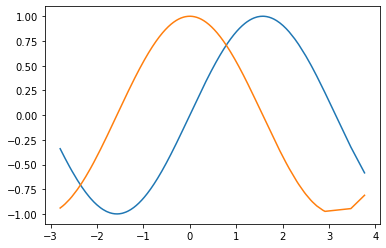

In [8]:
#绘制简单线性图
plt.plot(x,y1)
plt.plot(x,y2)

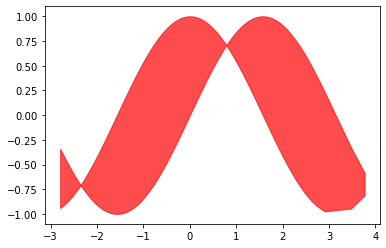

In [9]:
#填充两条曲线之间的区域
plt.fill_between(x, y1, y2, color = 'r',alpha = 0.7)

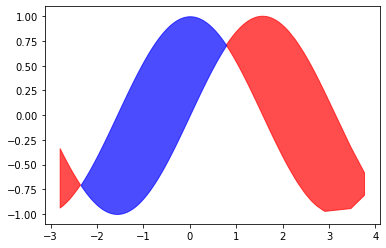

In [11]:
#当y1＞y2时，填充红色，否则填充蓝色
plt.fill_between(x, y1, y2, where = y1 > y2, color = 'r', alpha = 0.7, interpolate = True)
plt.fill_between(x, y1, y2, where = y1 <= y2, color = 'b', alpha = 0.7, interpolate = True)
#interpolate = True表示将计算实际交叉点并将填充区域扩展到此点

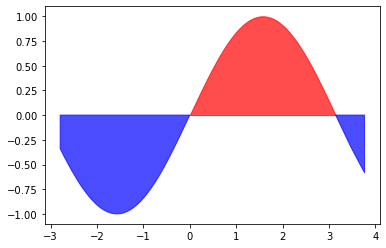

In [12]:
#sin(x)大于0填充红色，否则填充蓝色
plt.fill_between(x, y1, 0, where = y1 > 0, color = 'r', alpha = 0.7, interpolate = True)
plt.fill_between(x, y1, 0, where = y1 <= 0, color = 'b', alpha = 0.7, interpolate = True)
#interpolate = True表示将计算实际交叉点并将填充区域扩展到此点

### 2.5.3 认识绘图数据集

In [13]:
#导入数据集（方法一：导入数据集时将字符串文本转换为日期型文本）
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/economics.csv', parse_dates = ['date'])
#parse_dates的作用是将字符串序列转换为日期序列

In [14]:
df.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


In [15]:
df.shape

(574, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    datetime64[ns]
 1   pce       574 non-null    float64       
 2   pop       574 non-null    int64         
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 27.0 KB


In [18]:
#导入数据集（方法二：导入数据集后将字符串文本转换为日期型文本）
df1 = pd.read_csv('https://github.com/selva86/datasets/raw/master/economics.csv')

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    int64  
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 27.0+ KB


In [20]:
#方法二之方法1：pd.to_datetime()
df1['date1'] = pd.to_datetime(df1.date)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    int64         
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date1     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 31.5+ KB


In [23]:
#方法二之方法2：datetime.datetime.strptime()
import datetime
df1['date2'] = df1['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    int64         
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date1     574 non-null    datetime64[ns]
 7   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 36.0+ KB


In [25]:
df.head() #日期、个人消费支出、总人口、个人储蓄率、失业时长中位数、失业人数

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


### 2.5.4 认识绘图数据集

In [26]:
#准备绘图所需数据，选取前100个数据绘图
df = df[:100]

In [27]:
#提取目标特征
df.psavert.values

array([12.5, 12.5, 11.7, 12.5, 12.5, 12.1, 11.7, 12.2, 11.6, 12.2, 12. ,
       11.6, 10.6, 10.4, 10.4, 10.6, 10.4, 10.9, 10. ,  9.4,  9.9,  9.5,
       10. , 10.9, 11.7, 11.5, 11.5, 11.3, 11.5, 11.7, 11.7, 11.6, 12.3,
       13.3, 12.3, 11.7, 13.2, 13.1, 12.9, 13. , 13.3, 12.9, 13.1, 13.1,
       13.3, 13. , 13.4, 14.4, 13.6, 13.6, 12.9, 13. , 12.8, 12.9, 12.4,
       12.6, 11.5, 11.3, 11.5, 11.4, 11.4, 11.8, 12. , 12.7, 13.4, 13.4,
       12.1, 12.2, 12.4, 12.8, 12.8, 13.2, 12.8, 13.6, 12.8, 14. , 14. ,
       14.4, 14. , 13.8, 13. , 12.7, 12.3, 12.5, 12.7, 11.6, 12.3, 13. ,
       13.4, 13.6, 12.8, 12.1, 12.3, 13.9, 17. , 13.9, 12.3, 12.6, 12.6,
       13. ])

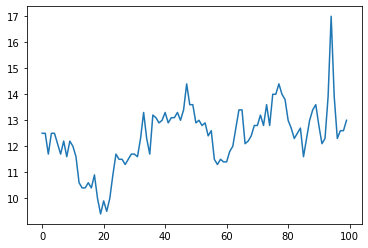

In [28]:
plt.plot(df.psavert.values)

In [30]:
#计算收益（本身-本身前）
income = df.psavert.diff().fillna(0)

In [31]:
income

0     0.0
1     0.0
2    -0.8
3     0.8
4     0.0
     ... 
95   -3.1
96   -1.6
97    0.3
98    0.0
99    0.4
Name: psavert, Length: 100, dtype: float64

In [32]:
#计算月度收益率（收益/本金 = (本身-前)/前）
re = (income / df.psavert.shift(1)).fillna(0) * 100
#shift(1)：所有序列后移1个

### 2.5.5 绘制目标图形

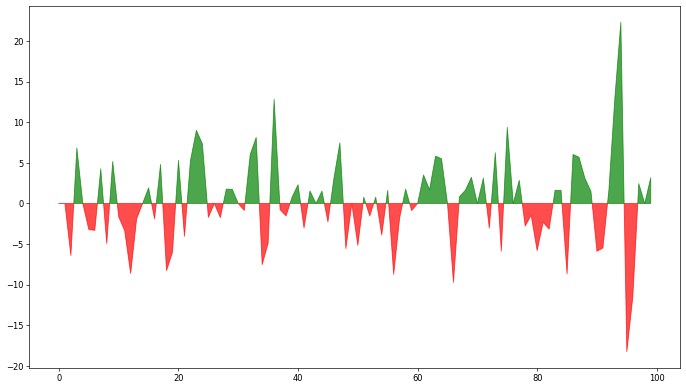

In [33]:
#创建画布并设定画布尺寸
plt.figure(figsize = (14,8), dpi = 60)

#绘制面积图
plt.fill_between(range(df.shape[0]), re, 0, where = re > 0, color = 'g', interpolate = True, alpha = 0.7)
plt.fill_between(range(df.shape[0]), re, 0, where = re <= 0, color = 'r', interpolate = True, alpha = 0.7)

修改横坐标刻度

In [35]:
y = df.date.dt.year #提取年份
y

0     1967
1     1967
2     1967
3     1967
4     1967
      ... 
95    1975
96    1975
97    1975
98    1975
99    1975
Name: date, Length: 100, dtype: int64

In [36]:
m = df.date.dt.month_name() #提取月份，并显示英文名字
m

0          July
1        August
2     September
3       October
4      November
        ...    
95         June
96         July
97       August
98    September
99      October
Name: date, Length: 100, dtype: object

In [37]:
#将年份和月份打包
[*zip(y,m)]

[(1967, 'July'),
 (1967, 'August'),
 (1967, 'September'),
 (1967, 'October'),
 (1967, 'November'),
 (1967, 'December'),
 (1968, 'January'),
 (1968, 'February'),
 (1968, 'March'),
 (1968, 'April'),
 (1968, 'May'),
 (1968, 'June'),
 (1968, 'July'),
 (1968, 'August'),
 (1968, 'September'),
 (1968, 'October'),
 (1968, 'November'),
 (1968, 'December'),
 (1969, 'January'),
 (1969, 'February'),
 (1969, 'March'),
 (1969, 'April'),
 (1969, 'May'),
 (1969, 'June'),
 (1969, 'July'),
 (1969, 'August'),
 (1969, 'September'),
 (1969, 'October'),
 (1969, 'November'),
 (1969, 'December'),
 (1970, 'January'),
 (1970, 'February'),
 (1970, 'March'),
 (1970, 'April'),
 (1970, 'May'),
 (1970, 'June'),
 (1970, 'July'),
 (1970, 'August'),
 (1970, 'September'),
 (1970, 'October'),
 (1970, 'November'),
 (1970, 'December'),
 (1971, 'January'),
 (1971, 'February'),
 (1971, 'March'),
 (1971, 'April'),
 (1971, 'May'),
 (1971, 'June'),
 (1971, 'July'),
 (1971, 'August'),
 (1971, 'September'),
 (1971, 'October'),
 (

In [38]:
#将月份(大写)和年份组合成'JUL-1967'形式
[str(m)[:3].upper() + '-' + str(y) for y,m in zip(y,m)]

['JUL-1967',
 'AUG-1967',
 'SEP-1967',
 'OCT-1967',
 'NOV-1967',
 'DEC-1967',
 'JAN-1968',
 'FEB-1968',
 'MAR-1968',
 'APR-1968',
 'MAY-1968',
 'JUN-1968',
 'JUL-1968',
 'AUG-1968',
 'SEP-1968',
 'OCT-1968',
 'NOV-1968',
 'DEC-1968',
 'JAN-1969',
 'FEB-1969',
 'MAR-1969',
 'APR-1969',
 'MAY-1969',
 'JUN-1969',
 'JUL-1969',
 'AUG-1969',
 'SEP-1969',
 'OCT-1969',
 'NOV-1969',
 'DEC-1969',
 'JAN-1970',
 'FEB-1970',
 'MAR-1970',
 'APR-1970',
 'MAY-1970',
 'JUN-1970',
 'JUL-1970',
 'AUG-1970',
 'SEP-1970',
 'OCT-1970',
 'NOV-1970',
 'DEC-1970',
 'JAN-1971',
 'FEB-1971',
 'MAR-1971',
 'APR-1971',
 'MAY-1971',
 'JUN-1971',
 'JUL-1971',
 'AUG-1971',
 'SEP-1971',
 'OCT-1971',
 'NOV-1971',
 'DEC-1971',
 'JAN-1972',
 'FEB-1972',
 'MAR-1972',
 'APR-1972',
 'MAY-1972',
 'JUN-1972',
 'JUL-1972',
 'AUG-1972',
 'SEP-1972',
 'OCT-1972',
 'NOV-1972',
 'DEC-1972',
 'JAN-1973',
 'FEB-1973',
 'MAR-1973',
 'APR-1973',
 'MAY-1973',
 'JUN-1973',
 'JUL-1973',
 'AUG-1973',
 'SEP-1973',
 'OCT-1973',
 'NOV-1973',

In [39]:
[str(m)[:3].upper() + '-' + str(y) for y,m in zip(y,m)][::6]

['JUL-1967',
 'JAN-1968',
 'JUL-1968',
 'JAN-1969',
 'JUL-1969',
 'JAN-1970',
 'JUL-1970',
 'JAN-1971',
 'JUL-1971',
 'JAN-1972',
 'JUL-1972',
 'JAN-1973',
 'JUL-1973',
 'JAN-1974',
 'JUL-1974',
 'JAN-1975',
 'JUL-1975']

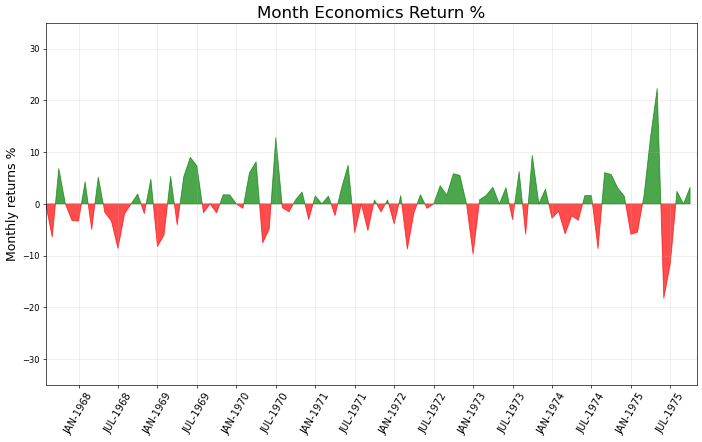

In [42]:
#创建画布并设定画布尺寸
plt.figure(figsize = (14,8), dpi = 60)

#绘制面积图
plt.fill_between(range(df.shape[0]), re, 0, where = re > 0, color = 'g', interpolate = True, alpha = 0.7)
plt.fill_between(range(df.shape[0]), re, 0, where = re <= 0, color = 'r', interpolate = True, alpha = 0.7)

#修改横坐标刻度
xticks = [str(m)[:3].upper() + '-' + str(y) for y,m in zip(y,m)][::6]
plt.xticks(range(df.shape[0])[::6], xticks, rotation = 60, fontsize = 12)

#添加装饰
plt.title('Month Economics Return %', fontsize = 20)
plt.ylabel('Monthly returns %', fontsize = 15)
plt.ylim(-35, 35)
plt.xlim(1, 100)
plt.grid(alpha = 0.3)

添加注释

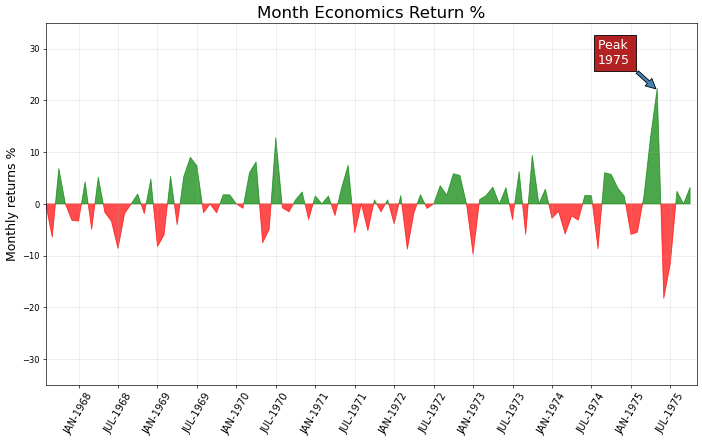

In [45]:
#创建画布并设定画布尺寸
plt.figure(figsize = (14,8), dpi = 60)

#绘制面积图
plt.fill_between(range(df.shape[0]), re, 0, where = re > 0, color = 'g', interpolate = True, alpha = 0.7)
plt.fill_between(range(df.shape[0]), re, 0, where = re <= 0, color = 'r', interpolate = True, alpha = 0.7)

#修改横坐标刻度
xticks = [str(m)[:3].upper() + '-' + str(y) for y,m in zip(y,m)][::6]
plt.xticks(range(df.shape[0])[::6], xticks, rotation = 60, fontsize = 12)

#添加注释
plt.annotate('Peak \n1975'
            ,xy = (94,22)
            ,xytext = (85,27)
            ,color = 'w'
            ,fontsize = 15
            ,bbox = dict(boxstyle = 'square'
                        ,fc = 'firebrick'
                        )
            ,arrowprops = dict(fc = 'steelblue'
                              ,shrink = 0.05 #箱体与箭头的距离
                              )
            )

#添加装饰
plt.title('Month Economics Return %', fontsize = 20)
plt.ylabel('Monthly returns %', fontsize = 15)
plt.ylim(-35, 35)
plt.xlim(1, 100)
plt.grid(alpha = 0.3)

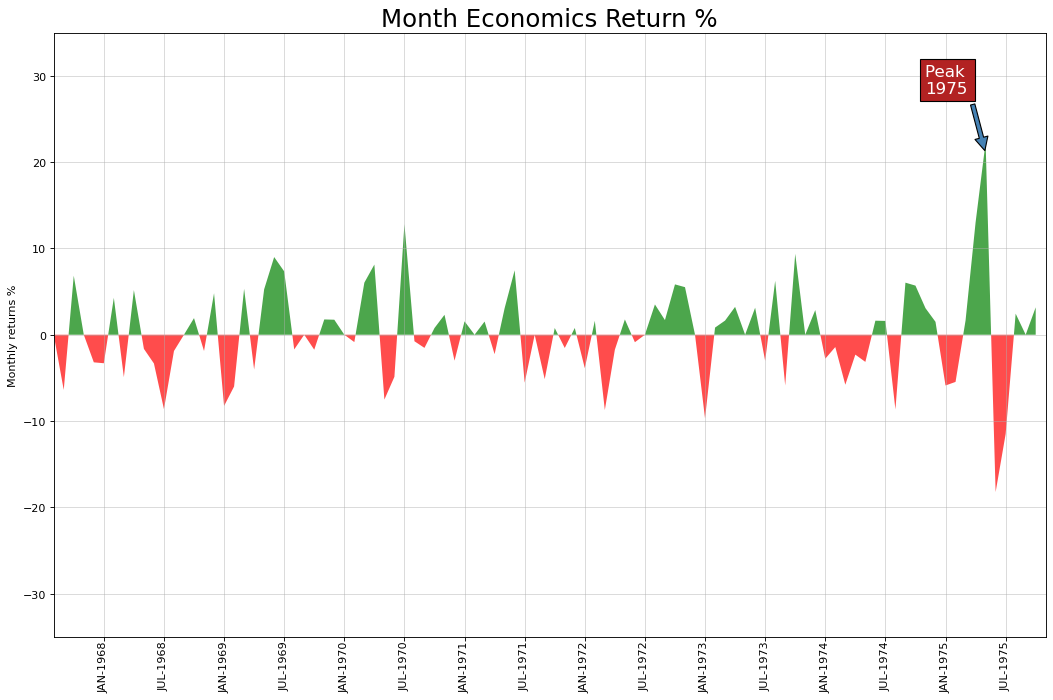

In [52]:
# Prepare Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100
# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)
# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28), bbox=dict(boxstyle='square', fc='firebrick'), arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()